<a href="https://colab.research.google.com/github/Wejdan999/T55/blob/main/K_means_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1 : Import the necessary Libraries
### import iris dataset


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import seaborn as sns

#Step 2 : Load the iris Dataset

In [13]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
x= df.iloc[:, [2, 3]].values

#Step 3 : Elbow Method
Finding the ideal number of groups to divide the data into is a basic stage in any unsupervised algorithm. One of the most common techniques for figuring out this ideal value of k is the elbow approach.





In [36]:
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(x)
    elbow.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

#Step 4 : Plot the Elbow graph to find the optimum number of cluster



In [21]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt


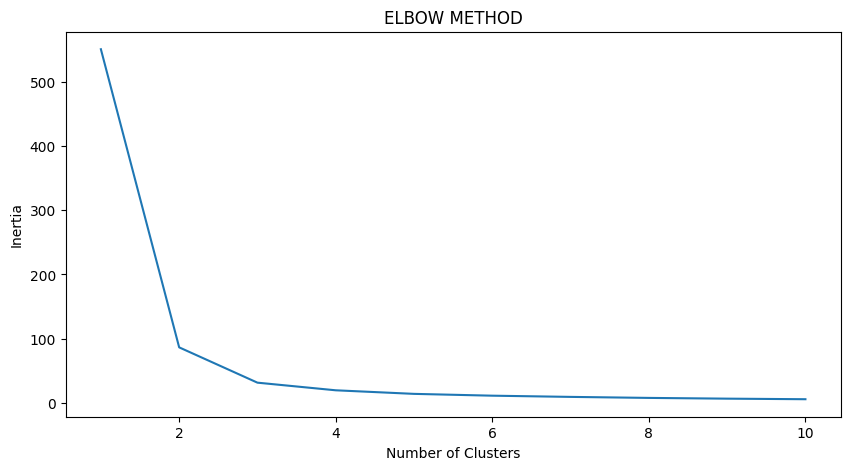

In [37]:

# Create a range for the x-axis that matches the length of your elbow data
x_range = range(1, 11)

sns.lineplot(x=x_range, y=elbow)
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The plot displays a scatter plot of data points (X[:,0], X[:,1]) with grid lines. It also marks the initial cluster centers (red stars) generated for K-means clustering.



#Step 5 : Build the Kmeans clustering model



*   Find the cluster center
*   Predict the cluster group





In [32]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(x)
kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

#Step 6 : Predict the cluster group

In [33]:
pred = kmeans.fit_predict(x)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

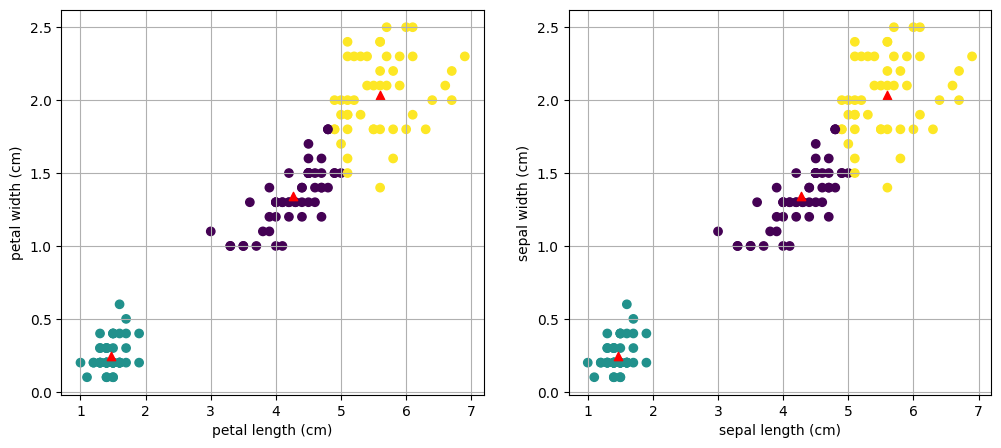

In [34]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1],c = pred)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2] # Slice center to get first two features
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.subplot(1,2,2)
# Use the first two features for the second plot as well
plt.scatter(x[:,0],x[:,1],c = pred)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2] # Slice center to get first two features
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)") # Update x-axis label
plt.ylabel("sepal width (cm)")  # Update y-axis label
plt.show()

#**Well done :)**
